Running RK4 Method:
	Simulation progress: 0 frames, 0.00 % complete
	Simulation progress: 1000 frames, 2.00 % complete
	Simulation progress: 2000 frames, 4.00 % complete
	Simulation progress: 3000 frames, 6.00 % complete
	Simulation progress: 4000 frames, 8.00 % complete
	Simulation progress: 5000 frames, 10.00 % complete
	Simulation progress: 6000 frames, 12.00 % complete
	Simulation progress: 7000 frames, 14.00 % complete
	Simulation progress: 8000 frames, 16.00 % complete
	Simulation progress: 9000 frames, 18.00 % complete
	Simulation progress: 10000 frames, 20.00 % complete
	Simulation progress: 11000 frames, 22.00 % complete
	Simulation progress: 12000 frames, 24.00 % complete
	Simulation progress: 13000 frames, 26.00 % complete
	Simulation progress: 14000 frames, 28.00 % complete
	Simulation progress: 15000 frames, 30.00 % complete
	Simulation progress: 16000 frames, 32.00 % complete
	Simulation progress: 17000 frames, 34.00 % complete
	Simulation progress: 18000 frames, 36.00 % 

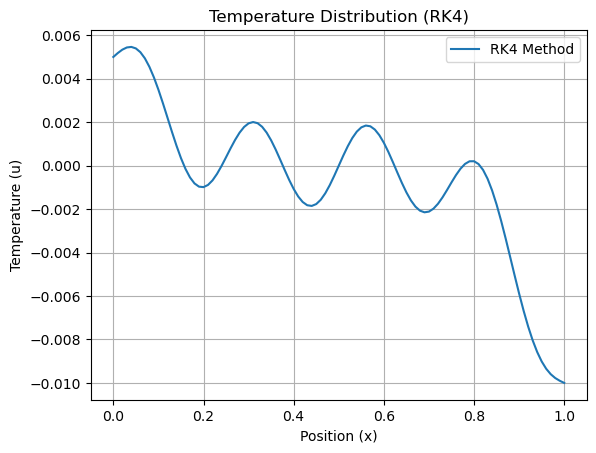

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time 

# Define the 1D Heat Equation Solver
class HeatEquationSolver1D:
	def __init__(self, nx, ns, L, T, D, method, nt_steps):
		"""
		Initialize the solver for the 1D heat equation.
		
		Parameters:
		- nx: Number of spatial grid points
		- ns: Number of snapshots for POD analysis
		- L: Length of the spatial domain
		- T: Total time of simulation
		- D: Thermal diffusivity
		- method: Numerical method for time-stepping ('Euler' or 'RK4')
		- nt_steps: Number of time steps
		"""
		self.nx = nx
		self.ns = ns
		self.dx = L / (nx - 1) 
		self.dt = T / nt_steps
		self.D = D
		self.nt_steps = nt_steps
		self.method = method
		self.x = np.linspace(0, L, nx)  # Spatial grid points
		self.u = np.zeros_like(self.x)  # Initialize temperature field
		
		# Initial conditions:

		# Multi-Modal sinusoidal
		A1, A2, A3 = 1.0, 0.5, 0.3	# Component amplitudes
		L1, L2, L3 = L/4, L/8, L/12 # Component wavelengths
		self.u[:] = (A1 * np.sin(2 * np.pi * self.x / L1) +
              A2 * np.sin(2 * np.pi * self.x / L2) +
              A3 * np.sin(2 * np.pi * self.x / L3))
		# Gaussian profile
		#self.u[:] = np.exp(-10 * (self.x - L / 2)**2)
		# Linear profile
		#self.u[:] = 2 * (self.x - L / 2)
		# Constant profile
		#self.u[:] = 2 
	
	def euler_step(self):
		"""Euler method for time-stepping."""
		u_new = np.copy(self.u)
		for i in range(1, self.nx - 1):
			u_new[i] = self.u[i] + self.D * self.dt / self.dx**2 * (self.u[i+1] - 2*self.u[i] + self.u[i-1])

		# Boundary conditions
		u_new[0] = 0
		u_new[-1] = 0

		self.u = u_new
	
	def rk4_step(self):
		"""Runge-Kutta 4th order method for time-stepping."""
		def heat_rhs(u):
			# Right-hand side of the heat equation
			du_dt = np.zeros_like(u)
			for i in range(1, self.nx - 1):
				du_dt[i] = self.D * (u[i+1] - 2*u[i] + u[i-1]) / self.dx**2
			return du_dt
		
		k1 = heat_rhs(self.u)
		k2 = heat_rhs(self.u + 0.5 * self.dt * k1)
		k3 = heat_rhs(self.u + 0.5 * self.dt * k2)
		k4 = heat_rhs(self.u + self.dt * k3)
		
		# Boundary conditions
		self.u[0] = 0.005
		self.u[-1] = -0.01

		self.u += self.dt / 6 * (k1 + 2*k2 + 2*k3 + k4)
	
	def run_simulation(self):
		"""Run the simulation using the selected numerical method."""
		snapshots = np.zeros((self.nx, self.ns))
		snapshot_interval = self.nt_steps // self.ns

		# print(snapshots.shape)

		print(f'Running {self.method} Method:')
		start_time = time.time()
		for t in range(self.nt_steps):
			if self.method == 'Euler':
				self.euler_step()
			elif self.method == 'RK4':
				self.rk4_step()
			if t % snapshot_interval == 0:
				snapshots[:, t // snapshot_interval] = self.u
				print(f'\tSimulation progress: {t} frames, {100*t/self.nt_steps:.2f} % complete')
		np.save('snapshots.npy', snapshots)
		duration = time.time() - start_time
		print(f'{self.method} Method duration: {duration:4f} s, {duration/self.nt_steps:.4e} s/ iteration')
	
	def plot_solution(self):
		"""Plot the final temperature distribution."""
		plt.plot(self.x, self.u, label=f'{self.method} Method')
		plt.title(f'Temperature Distribution ({self.method})')
		plt.xlabel('Position (x)')
		plt.ylabel('Temperature (u)')
		plt.legend()
		plt.grid(True)
		plt.show()


# Parameters for the simulation
nx = 101	 			# Number of spatial points
L = 1.0			  		# Length of the rod
T = 1.0			  		# Total time for simulation
D = 0.01	 		# Thermal diffusivity
nt_steps = int(5e4)	 	# Number of time steps
ns = 50					# Number of snapshots for POD analysis

# Run simulation with Euler method
# solver_euler = HeatEquationSolver1D(nx, ns, L, T, D, method='Euler', nt_steps=nt_steps)
# solver_euler.run_simulation()
# solver_euler.plot_solution()

# Run simulation with RK4 method
solver_rk4 = HeatEquationSolver1D(nx, ns, L, T, D, method='RK4', nt_steps=nt_steps)
solver_rk4.run_simulation()
solver_rk4.plot_solution()